Famous statistician John Tukey once said,

> **Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.**

In [213]:
from sklearn.datasets import load_iris
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import get_configdir, rcParams

In [214]:
rcParams['figure.figsize'] = (15.0, 4.0)

In [215]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [216]:
plt.style.use('bmh')

Set seaborn style for plotting

In [217]:
# Available seaborn palette names:
# deep, muted, bright, pastel, dark, colorblind
# sbn.color_palette("Paired")
# sbn.set(style = 'ticks', palette='pastel')

Load iris data

In [218]:
iris = load_iris()

In [219]:
print('The names of features in the Iris dataset are: \n{}'.format(iris.feature_names))

The names of features in the Iris dataset are: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [220]:
print('The classes in the target variable are: {}'.format(iris.target_names))

The classes in the target variable are: ['setosa' 'versicolor' 'virginica']


See what the data looks like

In [221]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Count of each class type

In [222]:
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

I want to plot the histogram of versicolor petal lengths. So for that, I need to get the rows which belong to class versicolor(index 1) and extract the petal length (index 2) from it.

In [223]:
# index in target numpy array whose value is 1 (versicolor)

ix=np.where(iris.target == 1)[0]

print('Row indexes where class is versicolor: \n\n{} '.format(ix))

versicolor = iris.data[ix]

Row indexes where class is versicolor: 

[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] 


Extract the third column (petal length) from the rows belonging to versicolor

In [224]:
versicolor_petal_length = np.take(versicolor, 2, axis=1)
versicolor_petal_length

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

Similarly, get the petal lengths for setosa and virginica too!

In [225]:
ix = np.where(iris.target == 0 )[0]
setosa = iris.data[ix]
setosa_petal_length = np.take(setosa, 2, axis=1)

ix = np.where(iris.target == 2 )[0]
virginica = iris.data[ix]
virginica_petal_length = np.take(virginica, 2, axis=1)

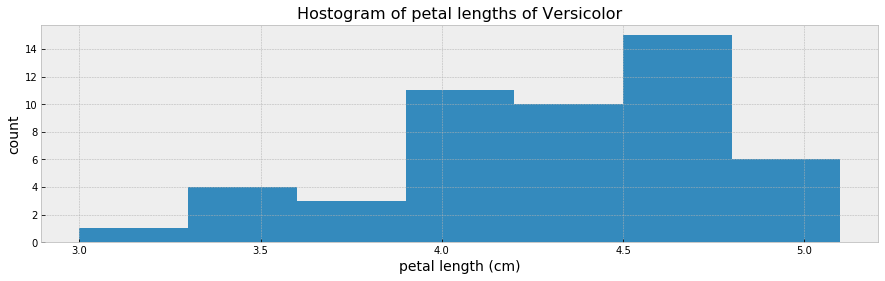

In [226]:
_ = plt.hist(versicolor_petal_length, bins=int(np.sqrt(len(versicolor_petal_length))))
_ = plt.xlabel('petal length (cm)', fontsize=14)
_ = plt.ylabel('count', fontsize=14)
_ = plt.title('Hostogram of petal lengths of Versicolor', fontsize=16)

## Beeswarm Plot

Let's create a dataframe from the iris data first.

In [227]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

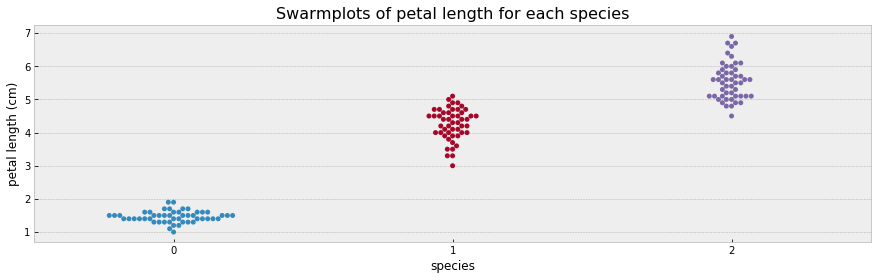

In [228]:
# plt.figure(figsize=(14,5))
_ = sbn.swarmplot(x='species', y = 'petal length (cm)', data=df)
_ = plt.title('Swarmplots of petal length for each species', fontsize=16)

## Empirical Cumulative ditribution function (ECDF)

In [229]:
def ecdf(data):
    """
    compute ECDF for a one dimensional array of measurements.
    The y data of the ECDF go from 1/n to 1 in equally spaced increments.
    the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1
    """
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1) / n
    return x,y

Plot ECDF of versicolor petal lengths.

In [230]:
x_vers, y_vers = ecdf(versicolor_petal_length)

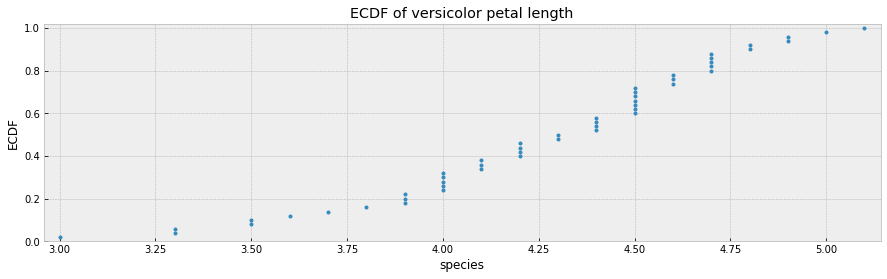

In [231]:
# plt.figure(figsize=(14,6))
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('species')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of versicolor petal length')
plt.show()

Let's plot ECDF for all species for comparison.

In [232]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

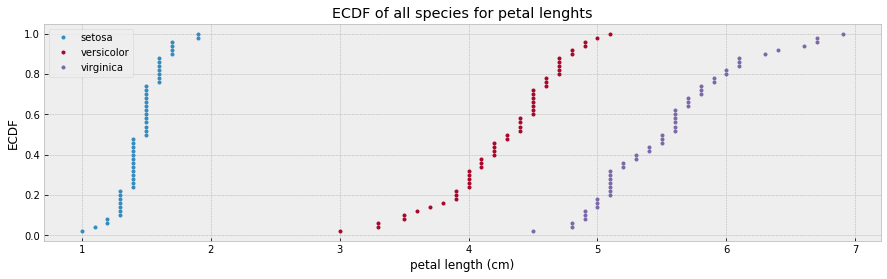

In [233]:
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')
plt.margins(0.05)
plt.legend(('setosa', 'versicolor', 'virginica'), loc='best')
_ = plt.title('ECDF of all species for petal lenghts')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

Mean, Median and

In [234]:
mean_length_versicolor = np.mean(versicolor_petal_length)
print('Mean versicolor petal length: ', mean_length_versicolor, 'cm')

Mean versicolor petal length:  4.26 cm


In [235]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
percentiles_versicolor = np.percentile(versicolor_petal_length, percentiles)
print(' Percentiles of versicolor petal lengths:  {}'.format(percentiles_versicolor))

 Percentiles of versicolor petal lengths:  [3.3    4.     4.35   4.6    4.9775]


ECDF and Percentile

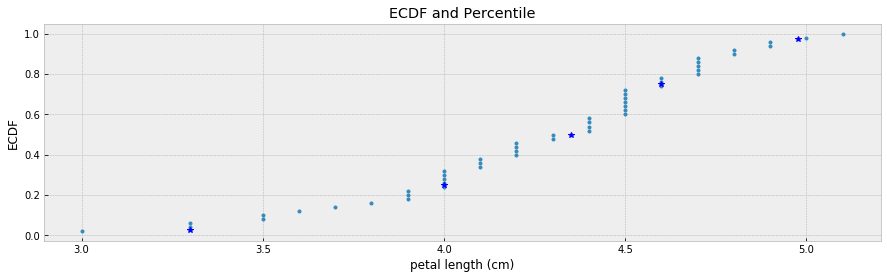

In [266]:
# plt.figure(figsize=(14,5))
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.05)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(percentiles_versicolor, percentiles/100, marker = '*', color = 'blue', linestyle='none')
plt.title('ECDF and Percentile')
plt.show()

## Box Plots

The center line of the box corresponds to the 50th percentile. The lower and upper edge of the box to the 25th and 75th percentile respectively. The space between the two thus represents the middle 50% of the data and known as the Inter Quantile Range (IQR). The whiskers are present at a distance of 1.5 * IQR or the extent of the data whichever is less extreme. All points outside the whisker are plotted as individual points and considered outliers.

You should NOT assume an outlier is irroneous unless there's reason to do so.

Let's first calculate the percentiles.

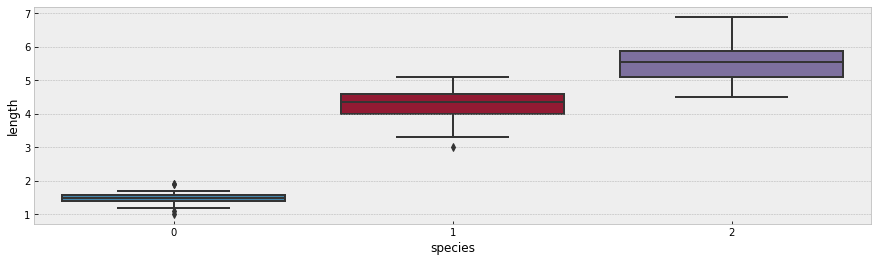

In [237]:
# plt.figure(figsize=(14,6))
_ = sbn.boxplot(x='species', y= 'petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('length')
plt.show()

## Variance

In [238]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = differences * differences
variance_explicit = np.mean(diff_sq)

In [239]:
variance_np = np.var(versicolor_petal_length)

In [240]:
print('Variance of Versicolor petal length calculated manually: {}'.format(variance_explicit))
print('Variance of Versicolor petal length calculated by Numpy: {}'.format(variance_np))

Variance of Versicolor petal length calculated manually: 0.21640000000000004
Variance of Versicolor petal length calculated by Numpy: 0.21640000000000004


## Standard Deviation

In [241]:
std_explicit = np.sqrt(variance_explicit)
std_np = np.std(versicolor_petal_length)

print('Standard Deviation of Versicolor petal length calculated manually: {}'.format(std_explicit))
print('Standard Deviation of Versicolor petal length calculated by Numpy: {}'.format(std_np))

Standard Deviation of Versicolor petal length calculated manually: 0.4651881339845203
Standard Deviation of Versicolor petal length calculated by Numpy: 0.4651881339845203


## A Scatter plot 

let's create a scatter plot between Versicolor petal length and petal width. First, we need to fetch the width from the dataset.

In [242]:
versicolor_petal_width = np.take(versicolor, 3, axis=1)

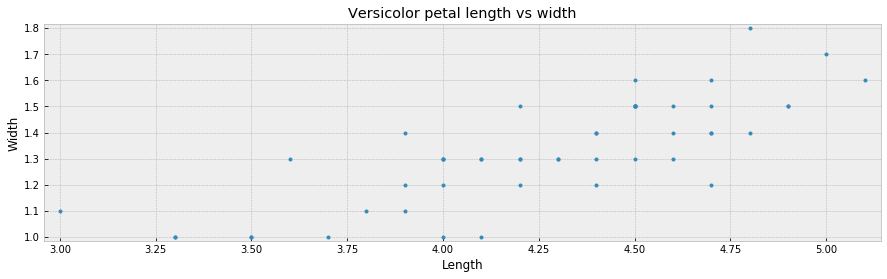

In [243]:
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, linestyle='none', marker='.')
plt.margins(0.02)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Versicolor petal length vs width')
plt.show()

## Covariance and Pearson's Corelation Coeficient

In [244]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

In [245]:
covariance_matrix

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [246]:
print('Covariance between Petal length and Width is: {}'.format(covariance_matrix[0,1]))

Covariance between Petal length and Width is: 0.07310204081632653


**Let's create a function for Pearson's corelation coef**

In [247]:
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print(r)

0.7866680885228169


## Hacker Statistics

It simply means that instead of literally gathering the data again and again, we can *simulate* the repeated measurements using code.

For demonstration, let me work with a simple experiment in the beginning. A coing flip. I'll simulate coinflips multiple times using the np.random.random() function offered by numpy. This function returns a value between 0 and 1 such that each number in that range is equally likely to occur. We can use this to determine the outcome of a coinflip toss! Note that such experiements where the random variable outcome can take only two values (H,T) are called Bernoulli trials.

General steps in Hacker statistics:

1. Determine how to simulate data
2. Simulate it many times
3. Probability of getting that outcome is the fraction of trials with the outcome of interest

Let's do a fun activity. Is the np.random.random() function truly uniforly distributed?

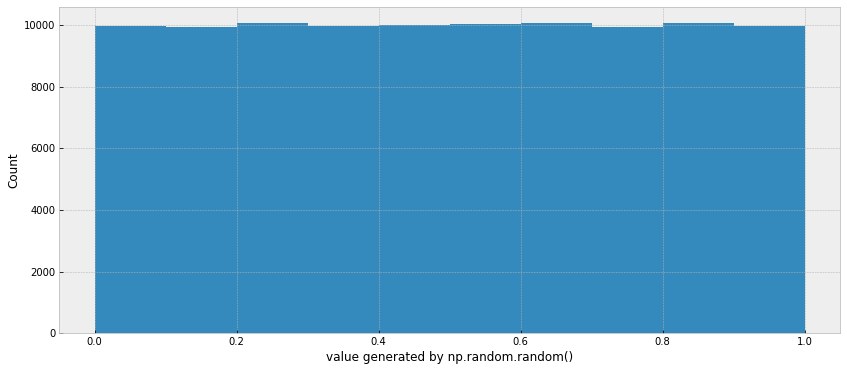

In [248]:
plt.figure(figsize=(14,6))
np.random.seed(13)
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
    
_ = plt.hist(random_numbers, bins=10)
plt.xlabel('value generated by np.random.random()')
plt.ylabel('Count')

plt.show()

Interesting! The histogram is almost perfectly flat. Meaning the there are equal number of samples in each bin.

**Bernoulli Trial**

In [249]:
def perform_bernoulli_trails(n, p):
    """
    Perform n Bernoulli trials with probability of success as P and return the number of successes.
    """
    
    n_success = 0
    
    for i in range(n):
        random_number  = np.random.random()
        if random_number < p:
            n_success+=1
    
    return n_success

**Predicting mortgage defaults**

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials()

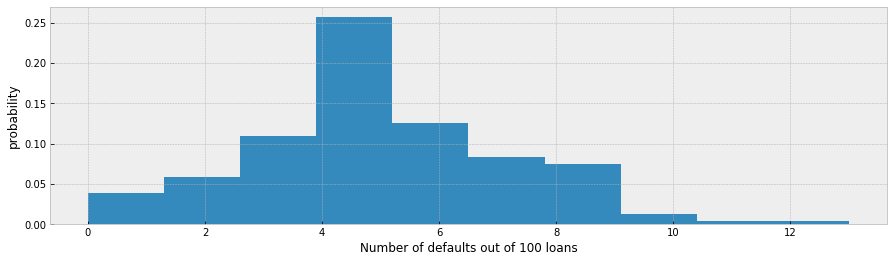

In [250]:
np.random.seed(13)

n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trails(100, 0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('Number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()

**Will the bank fail?**

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

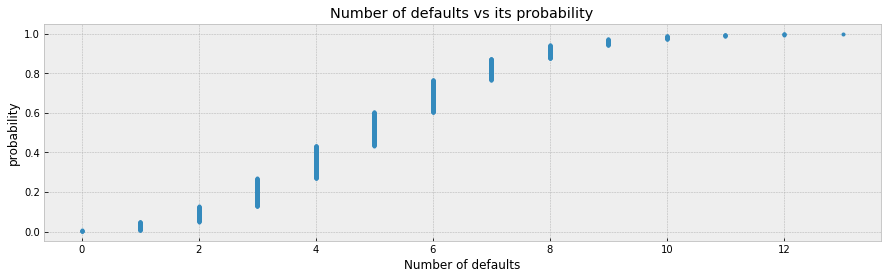

In [251]:
x,y = ecdf(n_defaults)
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.title('Number of defaults vs its probability')
_ = plt.xlabel('Number of defaults')
_ = plt.ylabel('probability')
plt.margins(0.05)

Number of 100 load simulations with 10 or more defaults

In [252]:
n_losing_money = np.sum(n_defaults > 10)
print('Probability of losing money: {}'.format(n_losing_money/len(n_defaults)))

Probability of losing money: 0.011


**Binomial Distribution**

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial()

This is identical to the calculation I did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

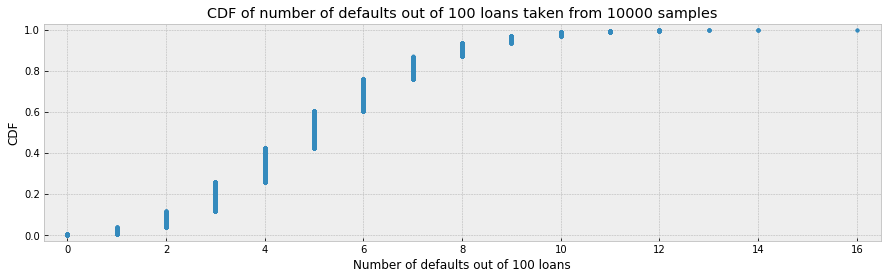

In [253]:
np.random.seed(13)
n_defaults = np.random.binomial(n=100, p = 0.05, size = 10000)

# compute x & Y for CDF
x,y = ecdf(n_defaults)

_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('Number of defaults out of 100 loans')
_ = plt.ylabel('CDF')
plt.title('CDF of number of defaults out of 100 loans taken from 10000 samples')
plt.margins(0.03)
plt.show()

Thus, if you know the story, using built-in algorithms to directly sample out of the distribution is much faster!

Now, plot the binomial PDF

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5]


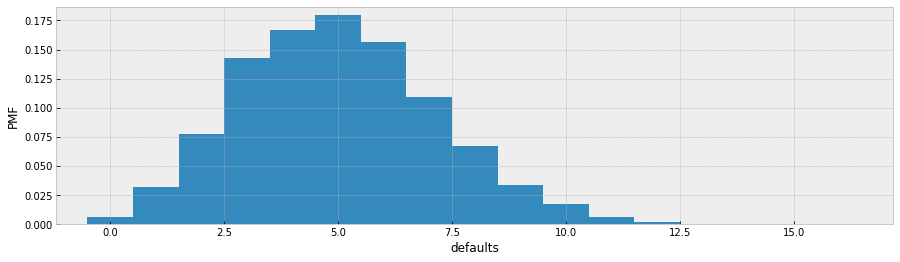

In [254]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
print(bins)
plt.hist(n_defaults, normed= True, bins=bins)

# Set margins
plt.margins(0.04)

# Label axes
plt.xlabel('defaults')
plt.ylabel('PMF')

# Show the plot
plt.show()

## Poisson Process and distribution

Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

We will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, we will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [255]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(size=10000, lam=10)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n=n[i],p= p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0207 3.153834413852446
n = 20 Binom: 9.9845 2.242734881790534
n = 100 Binom: 9.9524 3.0115667417475573
n = 1000 Binom: 10.0466 3.1300524660139484


The means are all about the same. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

**How many no-hitters in a season?**

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. 


**Was 2015 anomalous?**

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [256]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(lam=(251/115), size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0066


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

## Normal Distribution

NOTE:

mean of a Normal distribution =/= mean computed from data

std of a Normal distribution =/= std computed from data

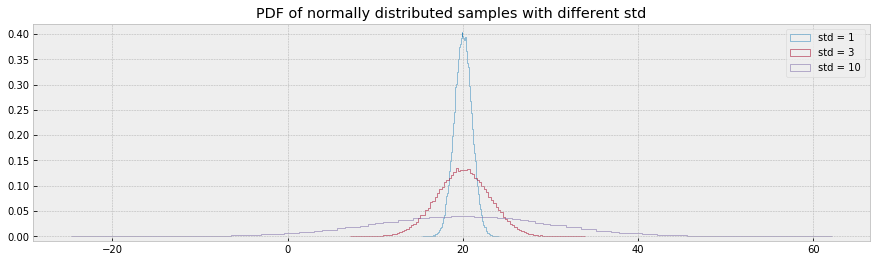

In [257]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1=np.random.normal(20,1,size=100000)
samples_std3=np.random.normal(20,3,size=100000)
samples_std10=np.random.normal(20,10,size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, normed = True, histtype='step')
plt.hist(samples_std3, bins=100, normed = True, histtype='step')
plt.hist(samples_std10, bins=100, normed = True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.title('PDF of normally distributed samples with different std')
plt.show()

Now, let's create CDF from these samples

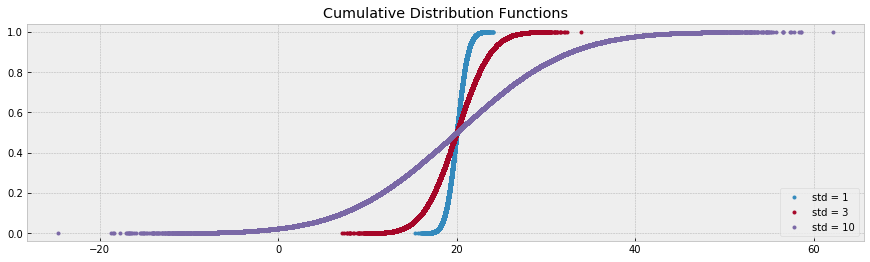

In [258]:
# Generate CDFs
x_std1,y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')
# Make 2% margin
plt.margins(0.04)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.title('Cumulative Distribution Functions')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

**Are the Belmont Stakes results Normally distributed?**

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [259]:
# These are the actual numbers from which outliers have been removed

belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

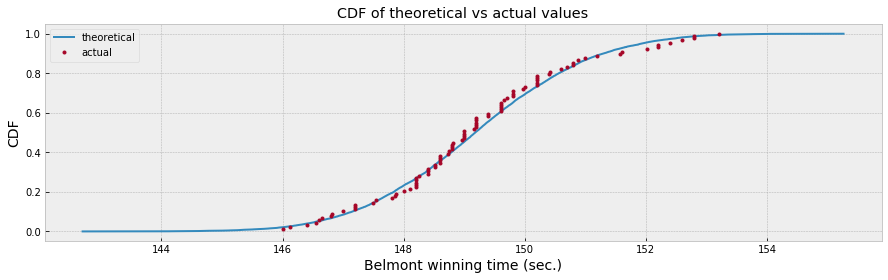

In [260]:
# Compute mean and standard deviation: mu, sigma
mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.05)
_ = plt.xlabel('Belmont winning time (sec.)', fontsize=14)
_ = plt.ylabel('CDF', fontsize=14)
plt.title('CDF of theoretical vs actual values')
plt.legend(('theoretical', 'actual'), loc='best')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

**What are the chances of a horse matching or beating Secretariat's record?**


Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [261]:
# Take a million samples out of the Normal distribution: samples
samples=np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000613


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

## Exponential distribution

Unfortunately, I was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed?

Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!

If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [262]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

**Distribution of no-hitters and cycles**

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

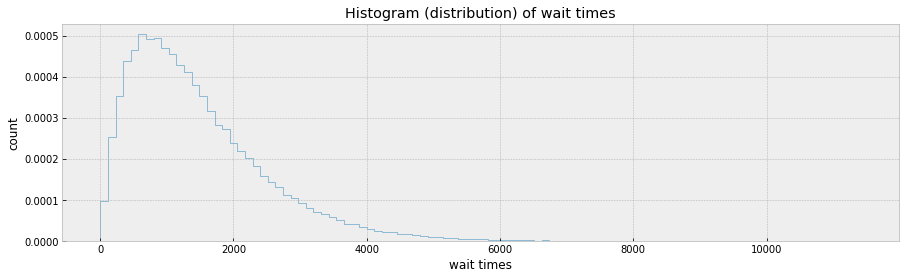

In [263]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, normed=True, histtype='step')

# Label axes
plt.xlabel('wait times')
plt.ylabel('count')
plt.title('Histogram (distribution) of wait times')

# Show the plot
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process.

In [264]:
waiting_times

array([1160.79497779, 2210.57520924,  243.20831906, ..., 1019.76779829,
        708.71185669, 3197.35013274])

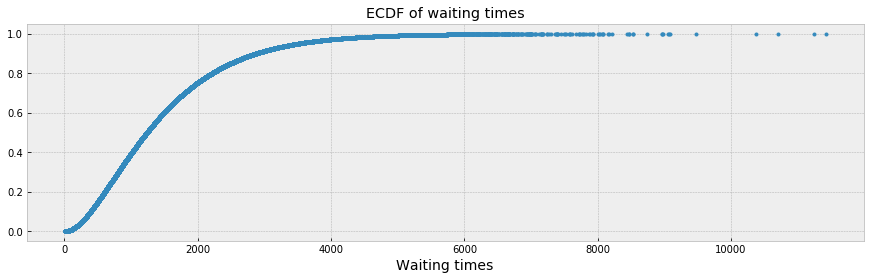

In [265]:
x, y = ecdf(waiting_times)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Waiting times', fontsize=14)
_ = plt.title('ECDF of waiting times')
plt.margins(0.05)

### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [267]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

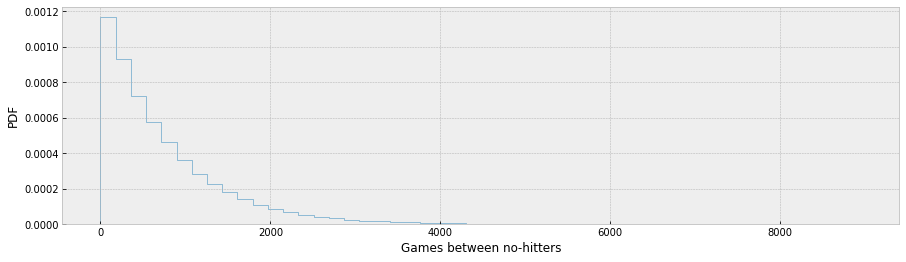

In [268]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

**Do the data follow our story?**

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

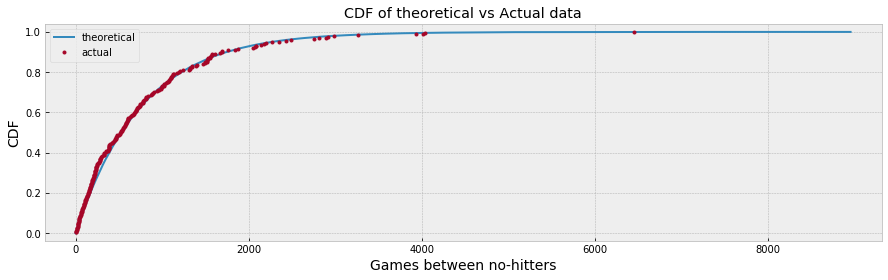

In [272]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.04)
plt.xlabel('Games between no-hitters', fontsize=14)
plt.ylabel('CDF', fontsize = 14)
plt.title('CDF of theoretical vs Actual data')
plt.legend(('theoretical', 'actual'), loc='best')
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

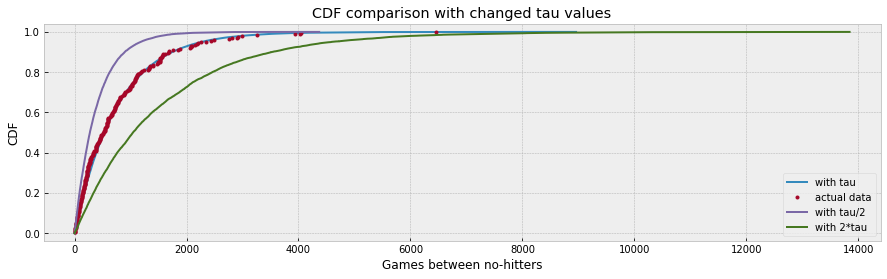

In [275]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
plt.margins(0.04)
plt.title('CDF comparison with changed tau values')
plt.legend(('with tau', 'actual data','with tau/2', 'with 2*tau'),loc='best')
# Show the plot
plt.show()

Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

### EDA of literacy/fertility data

In the next few cells, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [277]:
illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

In [287]:
# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


0.8041324026815341


the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

### Linear Regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


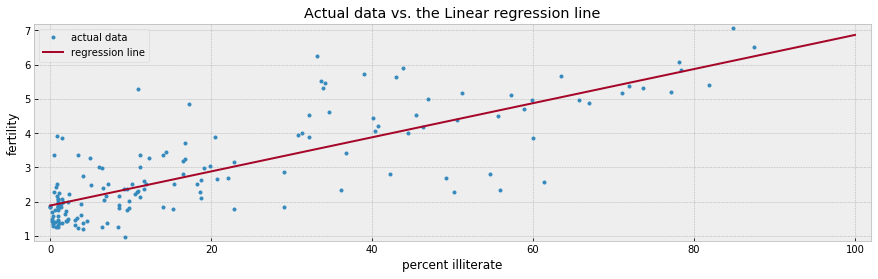

In [289]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

plt.title('Actual data vs. the Linear regression line')
plt.legend(('actual data', 'regression line'), loc='best')

# Draw the plot
plt.show()


**How is it optimal?**

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

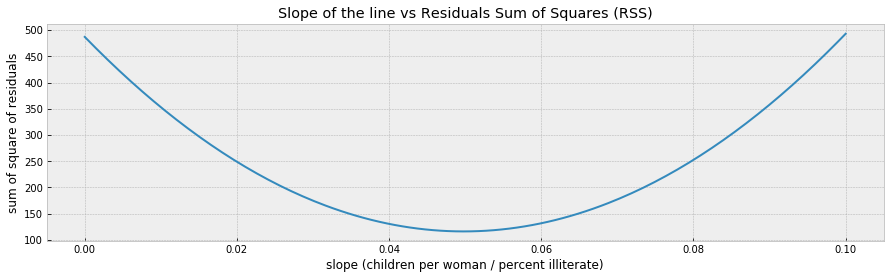

In [291]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)
    
# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.title('Slope of the line vs Residuals Sum of Squares (RSS)')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value we got when performing the regression.

### Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression. The Anscombe data are stored in the arrays x and y.

In [303]:
x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26, 
               10.84,   4.82,   5.68])

In [304]:
x.shape, y.shape

((11,), (11,))

0.5000909090909095 3.0000909090909076


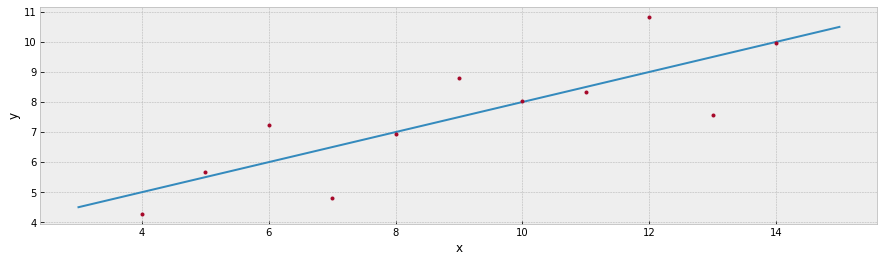

In [305]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x, y, marker='.',linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the x and y values for the second Anscombe data set.

In [308]:
anscombe_x = [np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])]

anscombe_y = [np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
         10.84,   4.82,   5.68]),
 np.array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13,
         7.26,  4.74]),
 np.array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39,
          8.15,   6.42,   5.73]),
 np.array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 ,
          5.56,   7.91,   6.89])]

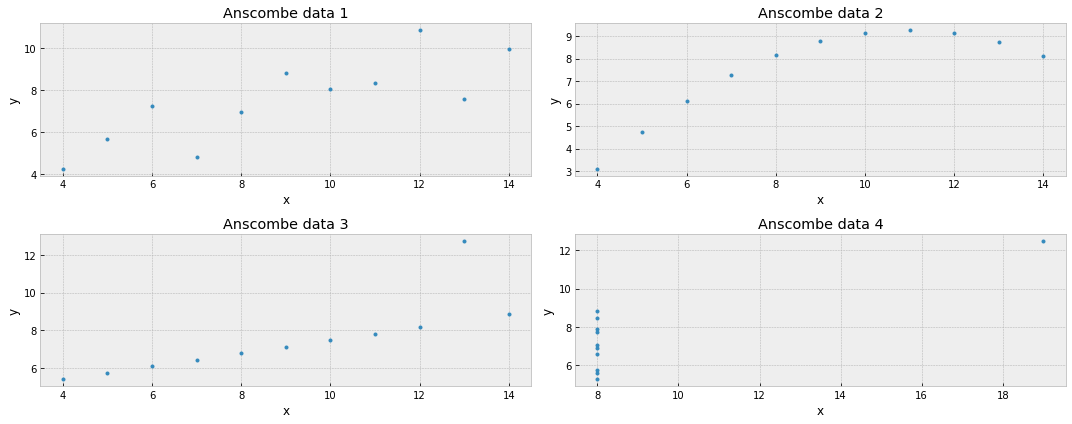

In [316]:
plot_no = 1
plt.figure(figsize=(15,6))
for x, y in zip(anscombe_x, anscombe_y):
    
    plt.subplot(2,2,plot_no)
    plt.plot(x,y, marker='.', linestyle='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Anscombe data {}'.format(plot_no))
    plot_no += 1
plt.tight_layout()

In [317]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


Indeed, they all have the same slope and intercept.

## Boostrap Samples

If we have a data set with n repeated measurements, a bootstrap sample is an array of length n that was drawn from the original data with replacement. And a boostrap replicate is a single value of a statistic computed from a bootstrap sample.

In this section, we will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [318]:
rainfall = np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

Take 50 boostrap samples and plot ecdf for each.

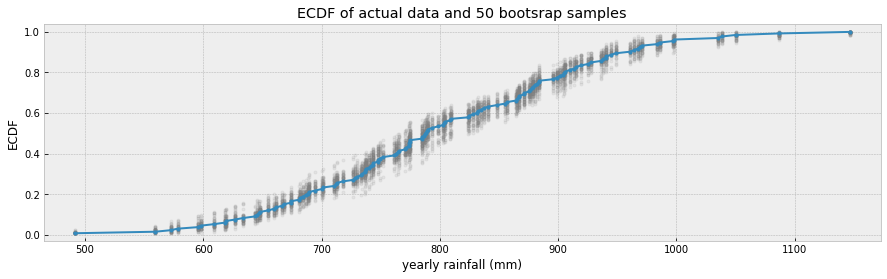

In [321]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.04)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.title('ECDF of actual data and 50 bootsrap samples')
# plt.legend(('Bootstrap', 'Original data'), loc='best')

# Show the plot
plt.show()

**Generating many bootsrap replicates**



In [322]:
def bootstrap_replicate_1d(data, func):
    """
    generate bootstrap replicate from 1D data
    """
    
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

In [323]:
def draw_bs_reps(data, func, size=1):
    """
        Draw #size bootstrap replicates.
    """

    # Initialize array of replicates: bs_replicates
    bs_replicates =  np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

The above two functions will be workhorses for us hereon.

## Bootstrap replicates of the mean and the SEM

We will now compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. We will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed (This does not hold in general, just for the mean and a few other statistics). This phenomenon is also known as the Central Limit Theorem (CLT). 

The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. i.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

Standard Error of the Mean : 10.510549150506188
Standard Deviation of the bootstrap replicates(mean) : 10.457586231678167


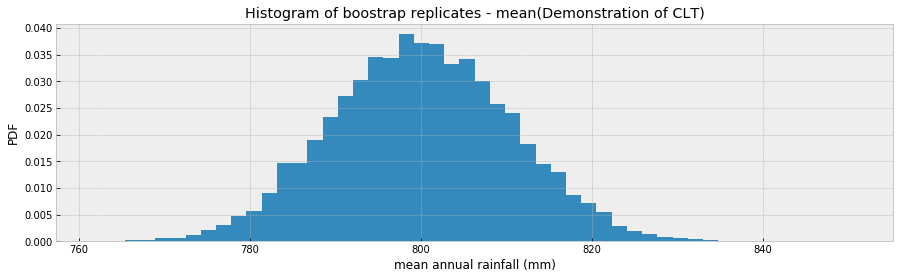

In [332]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(data=rainfall, func=np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print('Standard Error of the Mean :',sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Standard Deviation of the bootstrap replicates(mean) :',bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates,bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')
plt.title('Histogram of boostrap replicates - mean(Demonstration of CLT)')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

**Confidence intervals of rainfall data**

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use your bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

In [328]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.54860902, 821.0687594 ])

**Bootstrap replicates of other statistics**

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

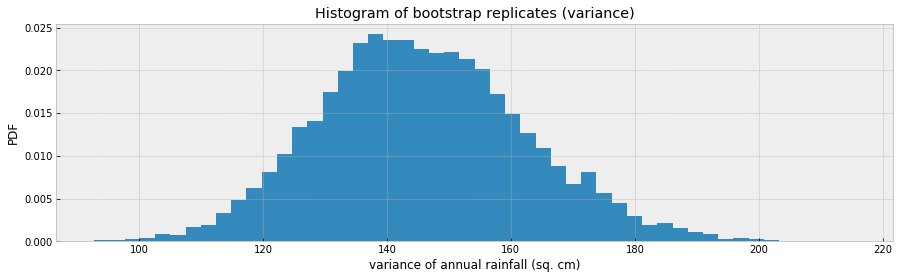

In [329]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates/=100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')
plt.title('Histogram of bootstrap replicates (variance)')

# Show the plot
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

In [331]:
np.percentile(bs_replicates, [5.0, 95.0])

array([119.7814207 , 174.51955359])

**Confidence interval on the rate of no-hitters**

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ(tau). Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [661.74442231 872.13844622] games


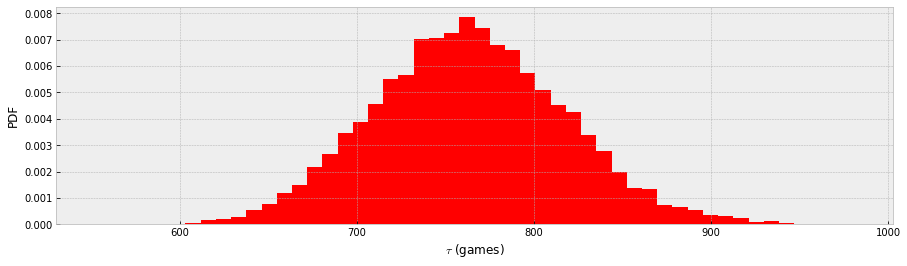

In [335]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True, color='red')
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

### Pairs Bootstrap

pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, we will write a function to perform pairs bootstrap on a set of x,y data.

In [336]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        # sample random indices and then slice x,y on it
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

Using the function we just wrote, let's perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.

[0.04419395 0.05532881]


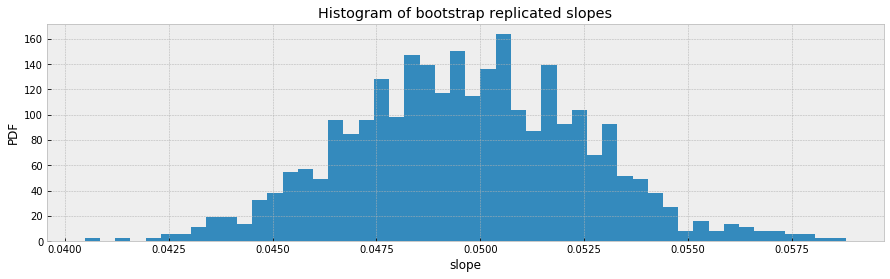

In [338]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.title('Histogram of bootstrap replicated slopes')
plt.show()


**Plotting bootstrap regressions**


A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

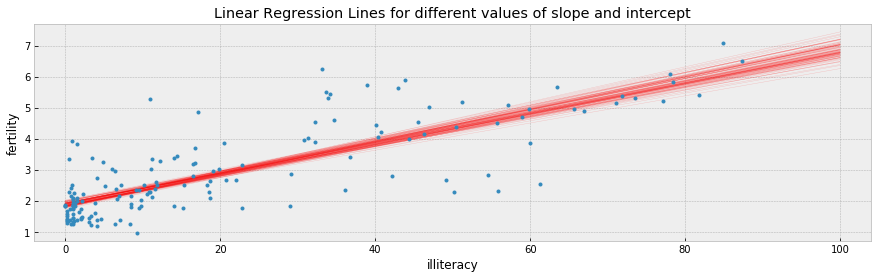

In [348]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.4, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.04)
plt.title('Linear Regression Lines for different values of slope and intercept')
plt.show()

**Generating a permutation sample**

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this section, we will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

In [349]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_june and rain_november.

In [359]:
rain_june = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = [  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8]

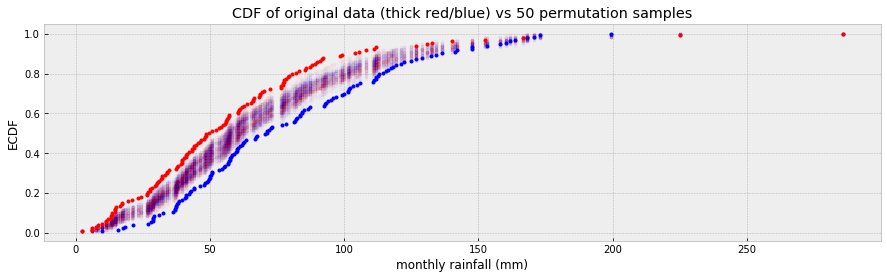

In [360]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.05)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.title('CDF of original data (thick red/blue) vs 50 permutation samples')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

**Generating permutation replicates**

A permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function we wrote is useful for us to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. 

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

In [361]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

## EDA before hypothesis testing

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

In [363]:
Id = ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

impact_force = [ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ,  0.172,  0.142,  0.037,  0.453,
        0.355,  0.022,  0.502,  0.273,  0.72 ,  0.582,  0.198,  0.198,
        0.597,  0.516,  0.815,  0.402,  0.605,  0.711,  0.614,  0.468]

df = pd.DataFrame({'ID':Id, 'impact_force':impact_force})

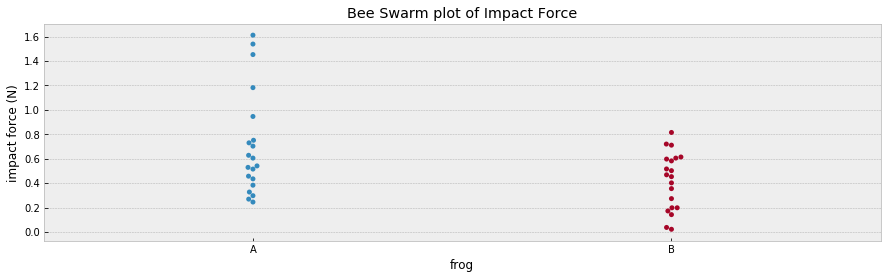

In [367]:
# Make bee swarm plot
_ = sbn.swarmplot(x='ID',y='impact_force',data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.title('Bee Swarm plot of Impact Force')
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

Permutation test on frog data
The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

In [368]:
force_a = np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])

force_b = np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [369]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0042


The p-value tells you that there is about a 0.42% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. It is advised that you do not distill it to a yes-or-no phrase. p = 0.0042 and p = 0.0000000042 are both said to be "statistically significant," but they are definitely not the same!